In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [2]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

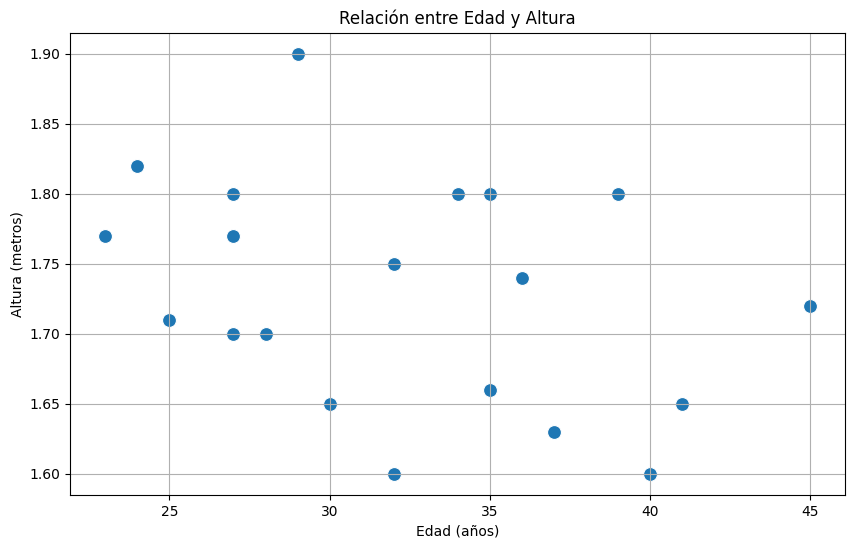

In [3]:
# Crear DataFrame
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])

# Visualización
# Crea una figura de tamaño 10x6 pulgadas para el gráfico
plt.figure(figsize=(10, 6))

# Dibuja un diagrama de dispersión (scatterplot) usando seaborn:
# - data=df: utiliza el DataFrame 'df' como fuente de datos
# - x="Edad": coloca la variable 'Edad' en el eje X
# - y="Altura": coloca la variable 'Altura' en el eje Y
# - s=100: establece el tamaño de los puntos en 100
sns.scatterplot(data=df, x="Edad", y="Altura", s=100)
plt.title("Relación entre Edad y Altura")
plt.xlabel("Edad (años)")
plt.ylabel("Altura (metros)")
plt.grid(True)
plt.show()

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [6]:
df = pd.DataFrame(lista_alumnos, columns=['Nombre', "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [8]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


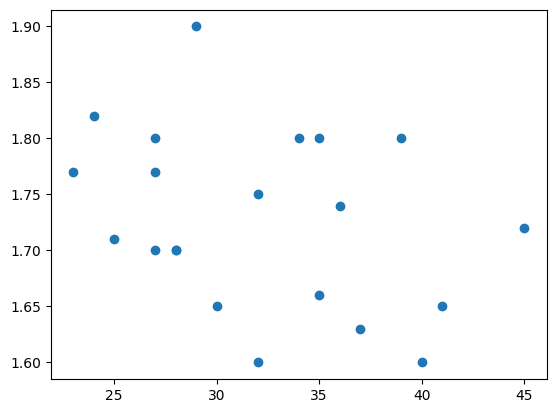

In [9]:
plt.scatter(df["Edad"], df["Altura"])

<Axes: xlabel='Edad', ylabel='Altura'>

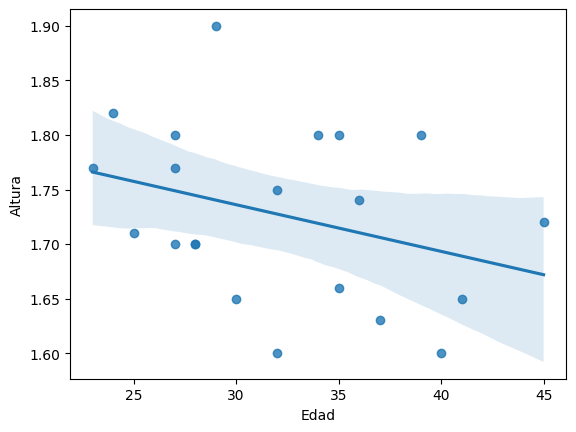

In [10]:
sns.regplot(x=df['Edad'], y=df['Altura'])

<Axes: >

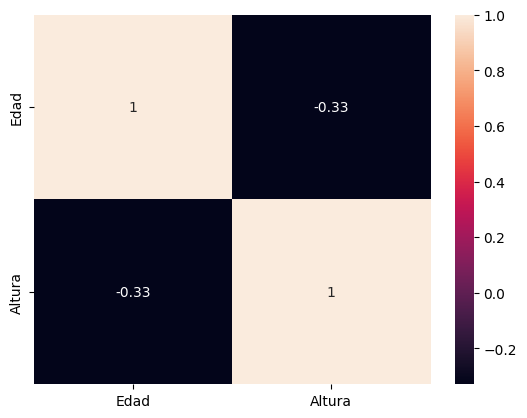

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

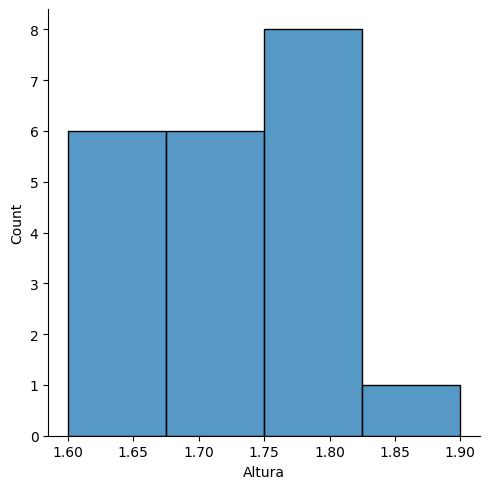

In [12]:
sns.displot(df['Altura'],bins=4)

Coeficiente de correlación:
-0.3292749795484255

Interpretación del coeficiente de correlación (-0.3293):
Correlación MODERADA - Regresión lineal con precaución


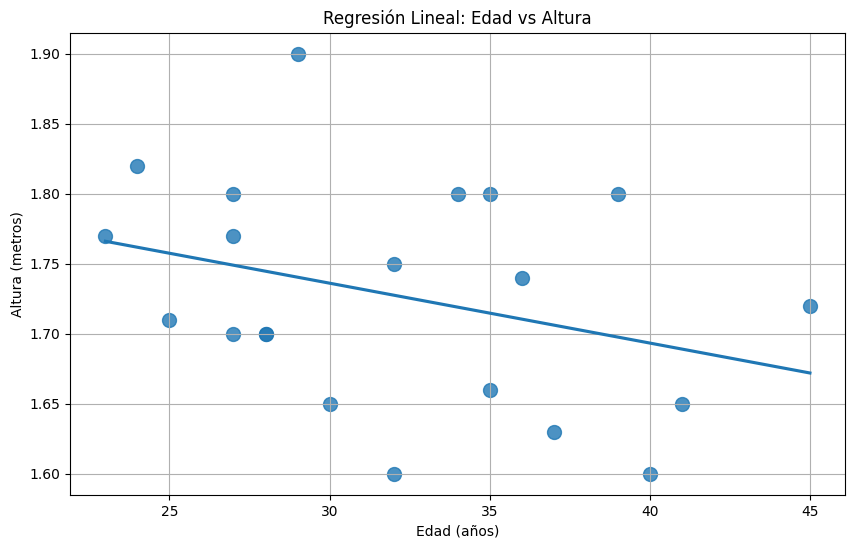

In [ ]:
# coeficiente de correlación
# +1 --> Correlación positiva perfecta (si una sube, la otra también sube)
# -1 --> Correlación negativa perfecta (si una sube, la otra baja)
# 0  --> No hay correlación lineal
correlation_coefficient = df["Edad"].corr(df["Altura"])
print("Coeficiente de correlación:")
print(correlation_coefficient)

# INTERPRETACIÓN
# Si |r| > 0.7: Correlación fuerte --> Regresión lineal apropiada - Los datos siguen una tendencia lineal clara
# Si 0.3 < |r| < 0.7: Correlación moderada --> Regresión lineal con precaución - La relación es lineal pero con variabilidad
# Si |r| < 0.3: Correlación débil --> Regresión lineal no recomendada - No hay una relación lineal clara
print(f"\nInterpretación del coeficiente de correlación ({correlation_coefficient:.4f}):")

if abs(correlation_coefficient) > 0.7:
    print("Correlación FUERTE - Regresión lineal podría ser apropiada")
elif abs(correlation_coefficient) > 0.3:
    print("Correlación MODERADA - Regresión lineal con precaución")
else:
    print("Correlación DÉBIL - Regresión lineal NO recomendada")

# Visualización con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Edad", y="Altura", ci=None, scatter_kws={"s": 100})
plt.title("Regresión Lineal: Edad vs Altura")
plt.xlabel("Edad (años)")
plt.ylabel("Altura (metros)")
plt.grid(True)
plt.show()



### Entrena un modelo de regresión lineal

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = df[['Edad']]
y = df['Altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


y = a + b*x

altura = a + b*Edad

In [16]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [17]:
lr.intercept_

np.float64(1.9428809062149202)

In [18]:
lr.coef_

array([-0.00690785])

Altura = 1.94 - 0.007 * Edad

In [19]:
altura = 1.94 - 0.007 * 20
altura

1.7999999999999998

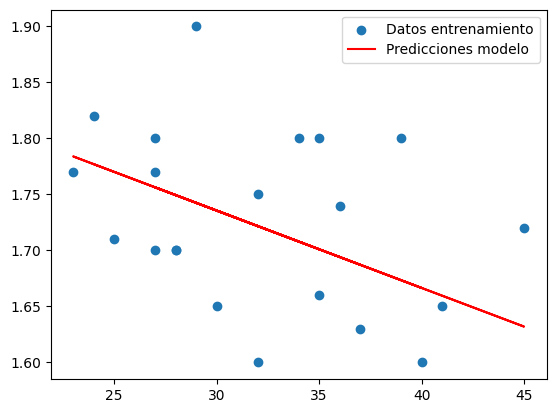

In [20]:
plt.scatter(df['Edad'], df['Altura'], label="Datos entrenamiento")
plt.plot(df['Edad'], lr.predict(X), color="r", label="Predicciones modelo")
plt.legend()

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([1.69419839, 1.67347484, 1.70110624, 1.77018471, 1.73564547])

In [22]:
df_eval = pd.DataFrame(X_test)
df_eval['Prediccion'] = y_pred
df_eval["Valor_real"] = y_test
df_eval['error'] = abs(df_eval['Prediccion'] - df_eval["Valor_real"])
df_eval

,Edad,Prediccion,Valor_real,error
8,36,1.694198,1.74,0.045802
13,39,1.673475,1.80,0.126525
20,35,1.701106,1.80,0.098894
1,25,1.770185,1.71,0.060185
11,30,1.735645,1.65,0.085645


In [23]:
df_eval['error'].mean()

np.float64(0.08341014389223393)

In [24]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

np.float64(0.08341014389223393)

In [25]:
df_eval['error_cuad'] = df_eval['error'] ** 2
df_eval['error_cuad'].mean()

np.float64(0.00776874525279269)

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

np.float64(0.00776874525279269)

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

np.float64(0.047731517116659405)

In [28]:
lr.predict([[10]])

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.87380243])

In [18]:
# ================================
# CÁLCULO DE ERRORES MANUAL
# ================================
print("\n" + "="*50)
print("ERRORES CALCULADOS MANUALMENTE")
print("="*50)

# 1. Error Absoluto Medio (MAE) - Manual
mae_manual = np.mean(np.abs(y_test - y_pred))
print(f"MAE Manual: {mae_manual:.4f} metros")

# 2. Error Cuadrático Medio (MSE) - Manual  
mse_manual = np.mean((y_test - y_pred)**2)
print(f"MSE Manual: {mse_manual:.4f} metros²")

# 3. Raíz del Error Cuadrático Medio (RMSE) - Manual
rmse_manual = np.sqrt(mse_manual)
print(f"RMSE Manual: {rmse_manual:.4f} metros")

# 4. Error Porcentual Absoluto Medio (MAPE) - Manual
mape_manual = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE Manual: {mape_manual:.2f}%")

# ================================
# CÁLCULO DE ERRORES CON SKLEARN
# ================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("\n" + "="*50)
print("ERRORES CALCULADOS CON SKLEARN")
print("="*50)

# 1. MAE con sklearn
mae_sklearn = mean_absolute_error(y_test, y_pred)
print(f"MAE sklearn: {mae_sklearn:.4f} metros")

# 2. MSE con sklearn
mse_sklearn = mean_squared_error(y_test, y_pred)
print(f"MSE sklearn: {mse_sklearn:.4f} metros²")

# 3. RMSE con sklearn
rmse_sklearn = np.sqrt(mse_sklearn)
print(f"RMSE sklearn: {rmse_sklearn:.4f} metros")

# 4. MAPE con sklearn (manualmente ya que sklearn no tiene MAPE directo)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_sklearn = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE sklearn: {mape_sklearn:.2f}%")

# ================================
# INTERPRETACIÓN DE ERRORES
# ================================
print("\n" + "="*50)
print("INTERPRETACIÓN DE LOS ERRORES")
print("="*50)

print(f"MAE: En promedio, el modelo se equivoca en {mae_manual:.3f} metros")
print(f"RMSE: Penaliza más los errores grandes. Error típico: {rmse_manual:.3f} metros")
print(f"MAPE: El modelo tiene un error porcentual promedio del {mape_manual:.1f}%")

# Contexto de los errores
altura_promedio = y_test.mean()
print(f"\nContexto:")
print(f"Altura promedio del conjunto de prueba: {altura_promedio:.3f} metros")
print(f"Error relativo (MAE/Altura_promedio): {(mae_manual/altura_promedio)*100:.1f}%")

if mape_manual < 5:
    print("Error bajo - Modelo aceptable")
elif mape_manual < 10:
    print("Error moderado - Modelo regular")
else:
    print("Error alto - Modelo deficiente")


ERRORES CALCULADOS MANUALMENTE
MAE Manual: 0.0532 metros
MSE Manual: 0.0033 metros²
RMSE Manual: 0.0576 metros
MAPE Manual: 2.99%

ERRORES CALCULADOS CON SKLEARN
MAE sklearn: 0.0532 metros
MSE sklearn: 0.0033 metros²
RMSE sklearn: 0.0576 metros
MAPE sklearn: 2.99%

INTERPRETACIÓN DE LOS ERRORES
MAE: En promedio, el modelo se equivoca en 0.053 metros
RMSE: Penaliza más los errores grandes. Error típico: 0.058 metros
MAPE: El modelo tiene un error porcentual promedio del 3.0%

Contexto:
Altura promedio del conjunto de prueba: 1.764 metros
Error relativo (MAE/Altura_promedio): 3.0%
Error bajo - Modelo aceptable


Forma de los datos:
X (Edad): (21, 1)
y (Altura): (21,)

Primeras 5 filas:
X: [24 25 35 37 29]
y: [1.82 1.71 1.66 1.63 1.9 ]
División de datos:
Entrenamiento: X_train (16, 1), y_train (16,)
Prueba: X_test (5, 1), y_test (5,)
Parámetros del modelo:
Pendiente (coeficiente): -0.004357
Intercepto: 1.858051

Ecuación: Altura = -0.004357 * Edad + 1.858051
Comparación Real vs Predicción:
   Edad  Altura_Real  Altura_Predicha   Error
0    24         1.82           1.7535  0.0665
1    34         1.80           1.7099  0.0901
2    32         1.75           1.7186  0.0314
3    25         1.71           1.7491 -0.0391
4    36         1.74           1.7012  0.0388


C:\Users\migue\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


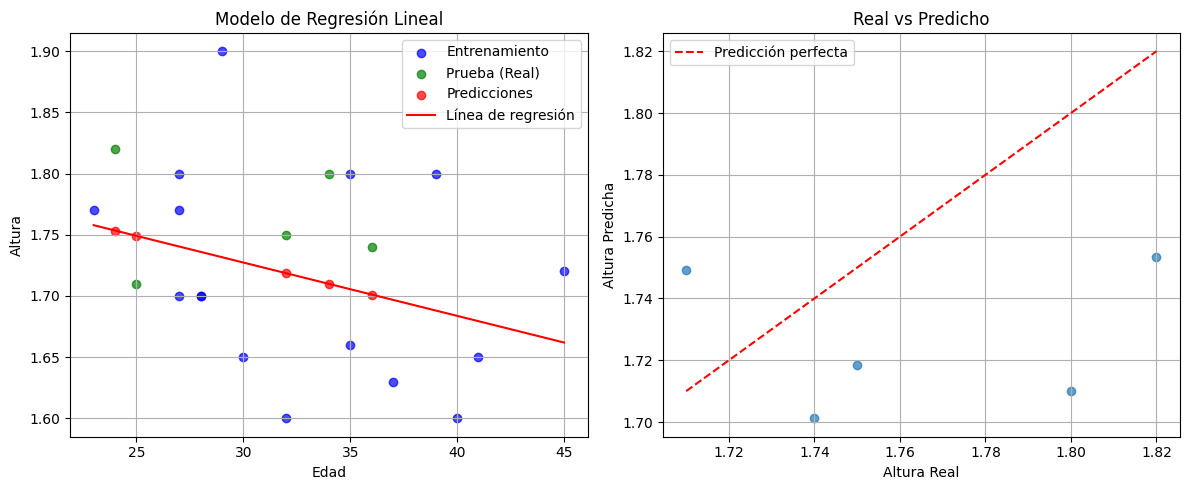

In [ ]:
# Preparar variables X (independiente) e y (dependiente)
X = df[['Edad']]  # Variable independiente - DEBE SER 2D para sklearn
y = df['Altura']  # Variable dependiente - puede ser 1D

print("Forma de los datos:")
print(f"X (Edad): {X.shape}")  # Debe ser (21, 1)
print(f"y (Altura): {y.shape}")  # Debe ser (21,)
print(f"\nPrimeras 5 filas:")
print("X:", X.head().values.flatten())
print("y:", y.head().values)

# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% para prueba
    random_state=42    # Para reproducibilidad
)

print("División de datos:")
print(f"Entrenamiento: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Prueba: X_test {X_test.shape}, y_test {y_test.shape}")

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Obtener parámetros del modelo
print("Parámetros del modelo:")
print(f"Pendiente (coeficiente): {modelo.coef_[0]:.6f}")
print(f"Intercepto: {modelo.intercept_:.6f}")
print(f"\nEcuación: Altura = {modelo.coef_[0]:.6f} * Edad + {modelo.intercept_:.6f}")

# Hacer predicciones en conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostrar comparación real vs predicción
import numpy as np
comparacion = pd.DataFrame({
    'Edad': X_test['Edad'].values,
    'Altura_Real': y_test.values,
    'Altura_Predicha': y_pred,
    'Error': y_test.values - y_pred
})
print("Comparación Real vs Predicción:")
print(comparacion.round(4))

# Gráfico de resultados
plt.figure(figsize=(12, 5))

# Subplot 1: Datos originales con línea de regresión
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.7, label='Entrenamiento', color='blue')
plt.scatter(X_test, y_test, alpha=0.7, label='Prueba (Real)', color='green')
plt.scatter(X_test, y_pred, alpha=0.7, label='Predicciones', color='red')

# Dibujar línea de regresión
edad_rango = np.linspace(X['Edad'].min(), X['Edad'].max(), 100)
altura_predicha = modelo.predict(edad_rango.reshape(-1, 1))
plt.plot(edad_rango, altura_predicha, 'r-', label='Línea de regresión')

plt.xlabel('Edad')
plt.ylabel('Altura')
plt.title('Modelo de Regresión Lineal')
plt.legend()
plt.grid(True)

# Subplot 2: Real vs Predicho
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Predicción perfecta')
plt.xlabel('Altura Real')
plt.ylabel('Altura Predicha')
plt.title('Real vs Predicho')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

